In [2]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [21]:
class AgentState(TypedDict):
    name: str
    guesses: List[int]
    lower_bound: int
    upper_bound: int
    attempts: int
    answer: int


def setup_node(state: AgentState) -> AgentState:
    """This is the setup node"""
    state["attempts"] = 0
    state["guesses"] = []
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    # state["answer"] = random.randint(1,20)

    return state

def guess_node(state: AgentState) -> AgentState:
    """This is the node to guess random number"""
    state["guesses"].append(random.randint(state["lower_bound"], state["upper_bound"]))
    state["attempts"] +=1
    if(state["guesses"][-1] < state["answer"]):
        print("Higher!")
        state["lower_bound"] = state["guesses"][-1]
    elif(state["guesses"][-1] > state["answer"]):
        print("Lower!")
        state["upper_bound"] = state["guesses"][-1]
    return state

def next_step(state: AgentState):
    """This the node that decides the next step"""
    print("inside next_step")
    if(state["guesses"][-1] == state["answer"]):
        return "END"
    elif(state["attempts"] >= 7):
        return "END"
    else: 
        print("Looping")
        return "loop"

In [22]:
graph = StateGraph(AgentState)
graph.add_node("setup_node", setup_node)
graph.add_node("guess_node", guess_node)
graph.add_edge(START, "setup_node")
graph.add_edge("setup_node", "guess_node")
graph.add_conditional_edges(
    "guess_node",
    next_step,
    {
        "loop": "guess_node",
        "END": END
    }
)

app=graph.compile()


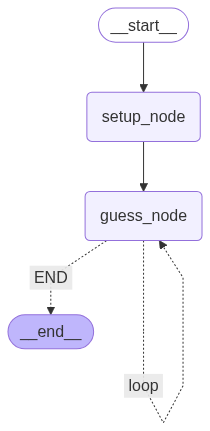

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
result = app.invoke({
    "name": "Valli",
    "answer": 8
})

print(result)

Lower!
inside next_step
Looping
Lower!
inside next_step
Looping
Higher!
inside next_step
Looping
Higher!
inside next_step
Looping
inside next_step
{'name': 'Valli', 'guesses': [15, 9, 7, 7, 8], 'lower_bound': 7, 'upper_bound': 9, 'attempts': 5, 'answer': 8}
